In [1]:
import pandas as pd

# Load the dataset
email_data = pd.read_csv('Email_data.csv')
email_data


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [2]:
# Check for missing values
missing_values = email_data.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

# Check the distribution of the target variable 'Prediction'
prediction_distribution = email_data['Prediction'].value_counts()
print(f"Prediction Distribution:\n{prediction_distribution}")


Total missing values: 0
Prediction Distribution:
Prediction
0    3672
1    1500
Name: count, dtype: int64


In [4]:
emails_data_cleaned = email_data.drop(columns=['Email No.'])
emails_data_cleaned  

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = email_data.drop(columns=['Email No.', 'Prediction'])
y = email_data['Prediction']

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the models
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [7]:
# Make predictions
nb_predictions = nb_model.predict(X_test)
# Evaluate the models
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print("Naive Bayes Classification Report:\n", nb_report)


Naive Bayes Accuracy: 0.885024154589372
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.93       739
           1       0.98      0.61      0.75       296

    accuracy                           0.89      1035
   macro avg       0.92      0.80      0.84      1035
weighted avg       0.90      0.89      0.88      1035



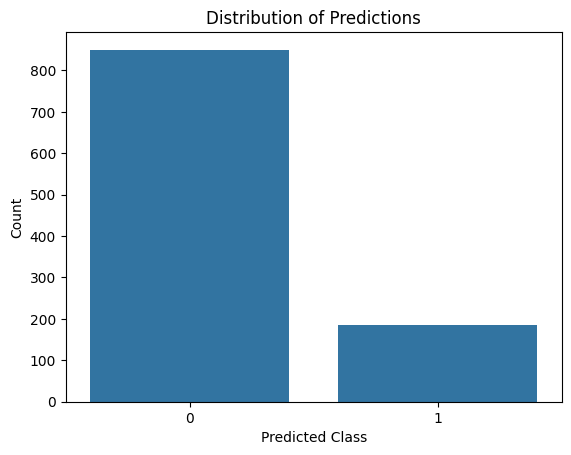

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=nb_predictions)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

In [10]:
# Make predictions
svm_predictions = svm_model.predict(X_test)
# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
print(f"Support Vector Machine Accuracy: {svm_accuracy}")
print("SVM Classification Report:\n", svm_report)


Support Vector Machine Accuracy: 0.978743961352657
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       739
           1       0.96      0.97      0.96       296

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



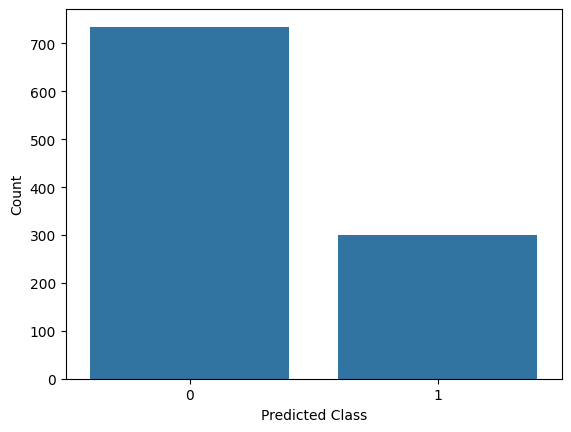

In [11]:
sns.countplot(x=svm_predictions)
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

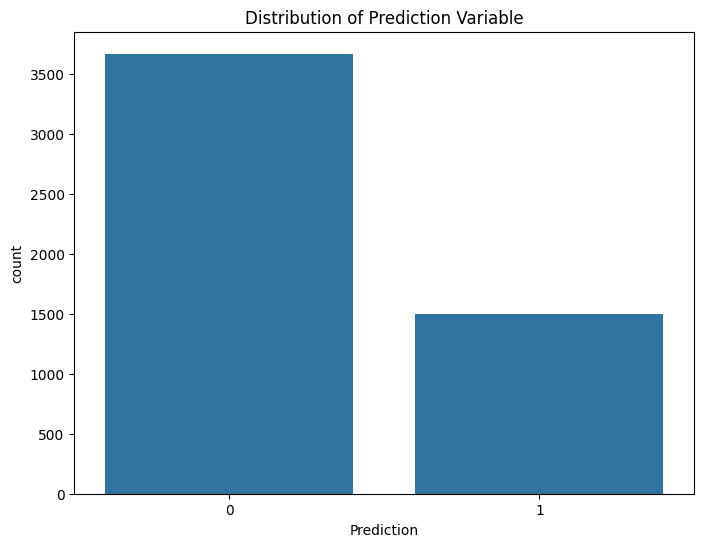

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Prediction variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Prediction', data=email_data)
plt.title('Distribution of Prediction Variable')
plt.show()


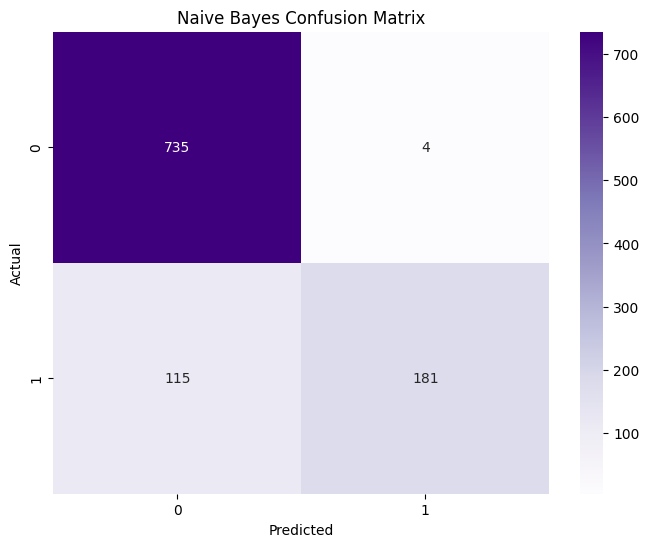

In [13]:
# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

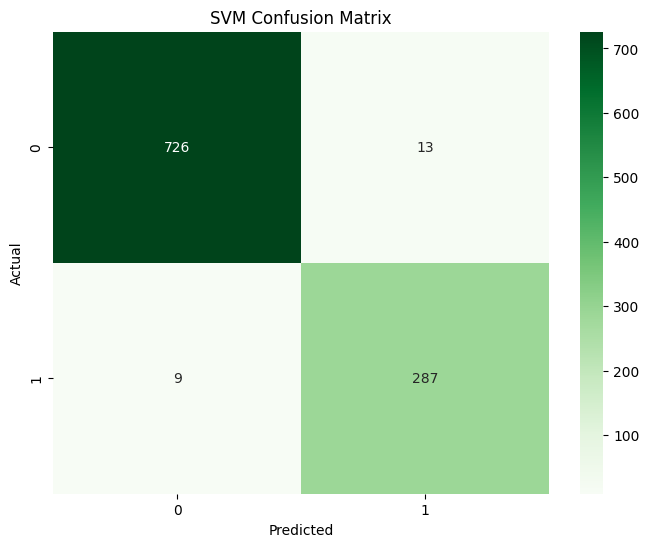

In [14]:
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

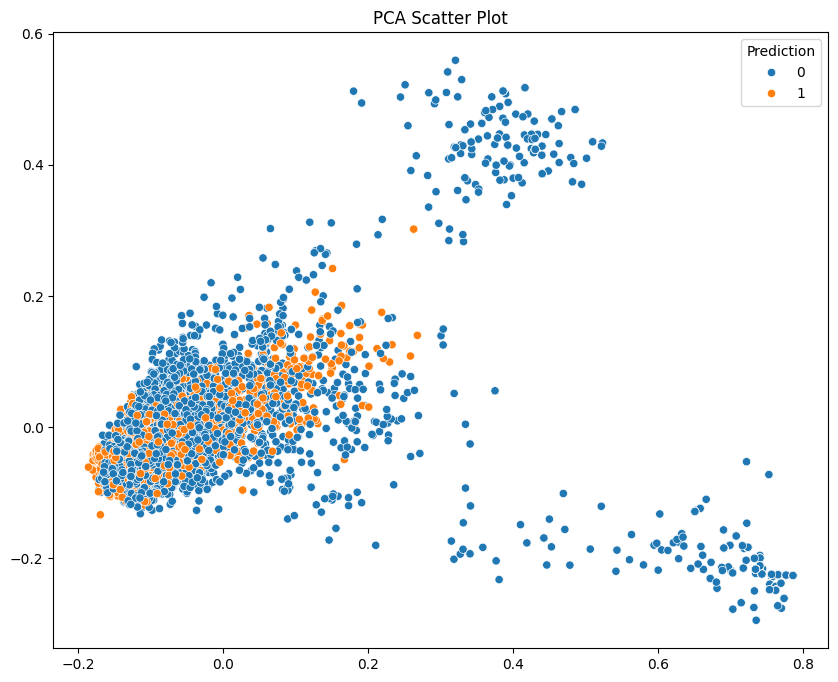

In [15]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Scatter plot of the two components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA Scatter Plot')
plt.show()


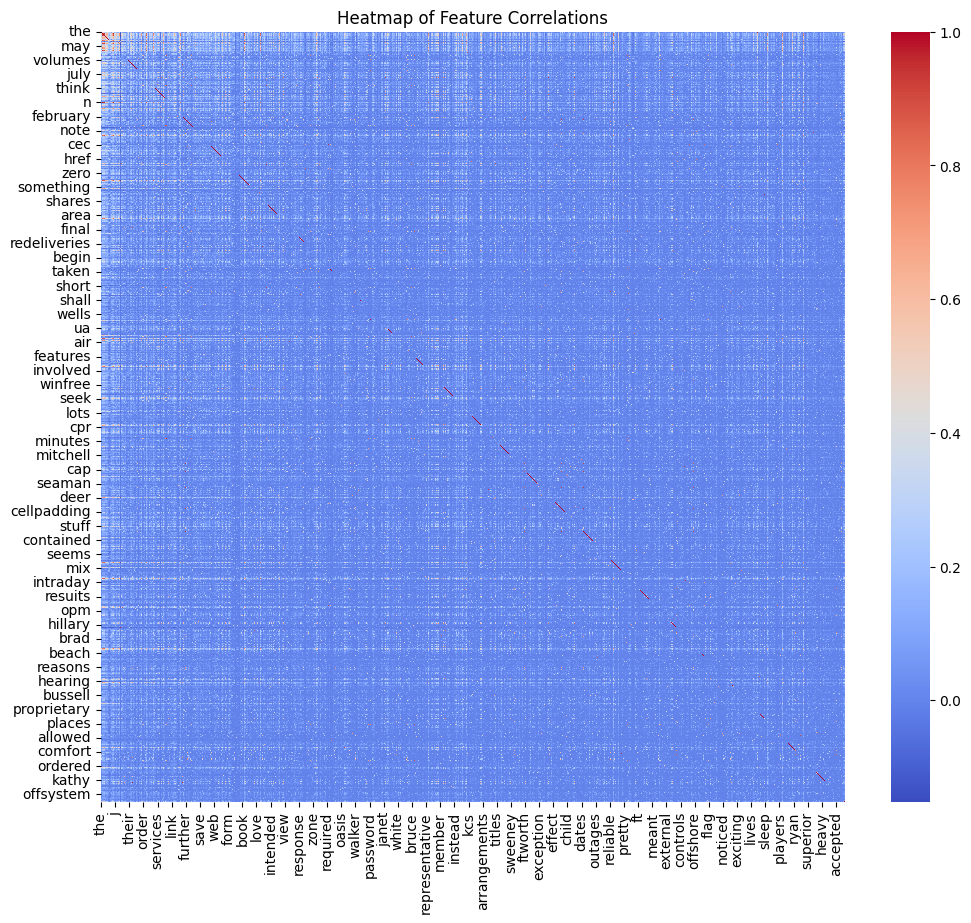

In [16]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()
